### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [188]:
data = pd.read_csv('data/coupons.csv')

In [189]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [190]:
#list all columns and return count of rows non-null
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [191]:

#sum all columns that are null for further overview of blank data
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [192]:
#drop car column with mostly blank data
data_clean = data.drop('car', axis =1)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

4. What proportion of the total observations chose to accept the coupon?



In [193]:
#visual display of column Y grouped by responses to ensure values are 0 & 1 as stated in instructions
acceptance = data_clean.groupby('Y')['Y'].value_counts()

#mean() function used on 0 & 1 values to return acceptance rate.
acceptance_rate = data_clean['Y'].mean()

#results printed
print(acceptance)

#result printed with Additional F-Strings for inline formatting
print(f"the acceptance rate is {acceptance_rate:.2%}")

Y
0    5474
1    7210
Name: count, dtype: int64
the acceptance rate is 56.84%


5. Use a bar plot to visualize the `coupon` column.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Restaurant(<20)'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

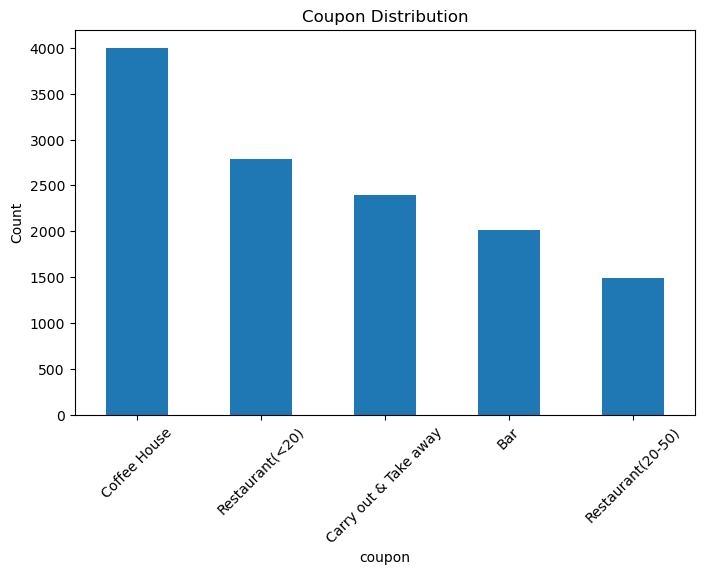

In [196]:
#count of coupon column with title and labels added with additional adjustment to fit better on chart

plt.figure(figsize=(8,5))
data_clean['coupon'].value_counts().plot(kind='bar')
plt.title('Coupon Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)


6. Use a histogram to visualize the temperature column.

63.301797540208135


Text(0, 0.5, 'Frequency')

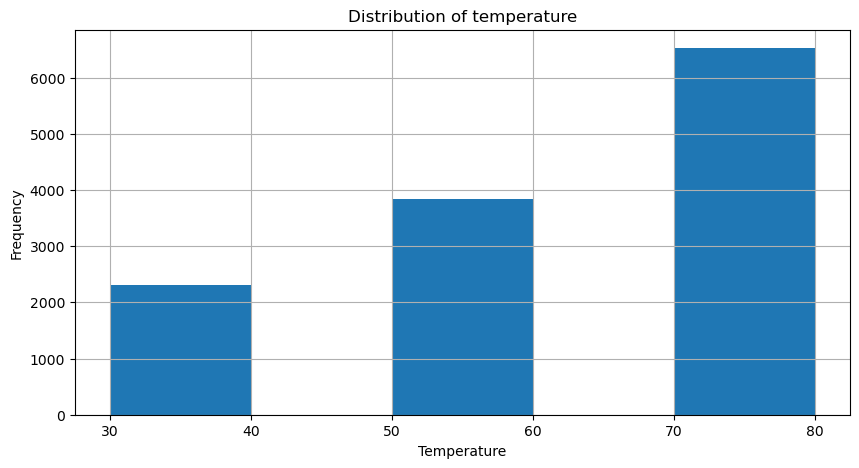

In [207]:
#check to see average temperature
temperature_average = data_clean['temperature'].mean()
print(temperature_average)

#histogram with title 
plt.figure(figsize=(10,5))
data_clean['temperature'].hist(bins=5)
plt.title ('Distribution of temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [198]:
#subset of bar coupons using dataframe column filter

bar_coupons = data_clean[data_clean['coupon']=='Bar']
bar_coupons.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   1996 non-null   object
 15  CoffeeHouse           1978 non-null   obje

2. What proportion of bar coupons were accepted?


In [199]:
#mean() function used on bar coupons subset to return acceptance rate.
bar_acceptance_rate = bar_coupons['Y'].mean()
print(f"the acceptance rate is {bar_acceptance_rate:.2%}")

the acceptance rate is 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [200]:
#return list of values in bar column to understand groupings
bar_column_values = bar_coupons.groupby('Bar')['Bar'].value_counts()
print(bar_column_values)

#create filters
Bar_3_or_fewer_filters = ['1~3','less1']
Bar_more_than_3_filter = ['4~8','gt8']

#use query function to filter on appropriate values and return mean based on Y column
low = bar_coupons.query("Bar in @Bar_3_or_fewer_filters")['Y'].mean()
high = bar_coupons.query("Bar in @Bar_more_than_3_filter")['Y'].mean()

#print values with formatting
print(f"the acceptance rate for 3 or fewer times a month is {low:.2%}")
print(f"the acceptance rate for more than 3 times a month is {high:.2%}")

Bar
1~3      397
4~8      150
gt8       49
less1    570
never    830
Name: count, dtype: int64
the acceptance rate for 3 or fewer times a month is 52.74%
the acceptance rate for more than 3 times a month is 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [201]:
#return list of values in age column to understand groupings
age_column_values = bar_coupons.groupby('age')['age'].value_counts()
print(age_column_values)

#create filters
Bar_Greater_1_Month = ['1~3','4~8','gt8']
other = ['less1','never']

#copy bar_coupons dataframe, remove text from age column and update to float in order to simplify query on age
bar_coupons_update = bar_coupons.copy()
bar_coupons_update['age'] = bar_coupons_update['age'].str.replace('plus', '').str.replace('below', '').astype(float)


#use query function to filter on appropriate values from list and less those that are over 25 years of age. Rreturn mean based on Y column
more_than_once_over25 = bar_coupons_update.query("Bar in @Bar_Greater_1_Month and age > 25")['Y'].mean()
other = bar_coupons_update.query("Bar in @other and age > 25")['Y'].mean()

#print values with formatting
print(f"the acceptance rate for those who go to a bar more than once a month and are over 25 is {more_than_once_over25:.2%}")
print(f"the acceptance rate for all the others {other:.2%}")

age
21         417
26         395
31         339
36         209
41         178
46         109
50plus     283
below21     87
Name: count, dtype: int64
the acceptance rate for those who go to a bar more than once a month and are over 25 is 69.52%
the acceptance rate for all the others 26.10%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [203]:
##return list of values in occupation column to understand exact groupings
occupation_column_values = bar_coupons.groupby('occupation')['occupation'].value_counts()
print(occupation_column_values)

##return list of values in passenger column to understand exact groupings
passanger_column_values = bar_coupons.groupby('passanger')['passanger'].value_counts()
print(passanger_column_values)


#use query function not equal to filter on appropriate occupation & passanger values. Return mean based on Y column
bar_more_than_once = bar_coupons_update.query("Bar in @Bar_Greater_1_Month and occupation != 'Farming Fishing & Forestry' and passanger != 'Kid(s)'")['Y'].mean()

#print values with formatting
print(f"the acceptance rate for those who go to a bar more than once had no kids in the car and had occupations other than farming, fishing, or forestry {bar_more_than_once:.2%}")

occupation
Architecture & Engineering                    27
Arts Design Entertainment Sports & Media     100
Building & Grounds Cleaning & Maintenance      7
Business & Financial                          89
Community & Social Services                   44
Computer & Mathematical                      232
Construction & Extraction                     24
Education&Training&Library                   140
Farming Fishing & Forestry                     9
Food Preparation & Serving Related            48
Healthcare Practitioners & Technical          41
Healthcare Support                            44
Installation Maintenance & Repair             18
Legal                                         34
Life Physical Social Science                  24
Management                                   119
Office & Administrative Support              105
Personal Care & Service                       27
Production Occupations                        18
Protective Service                            27
Retired  

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

(array([0, 1, 2]),
 [Text(0, 0, 'Home'), Text(1, 0, 'Work'), Text(2, 0, 'No Urgent Place')])

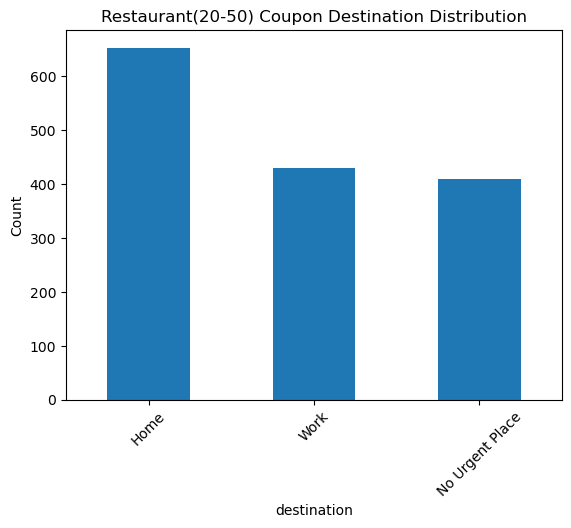

In [208]:
#subset of Restaurant(20-50) coupons using dataframe column filter
resturant20_50_coupons = data_clean[data_clean['coupon']=='Restaurant(20-50)']

#count of Restaurant(20-50) sum set by destination column with title and labels added with additional adjustment to fit better on chart
resturant20_50_coupons['destination'].value_counts().plot(kind='bar')
plt.title('Restaurant(20-50) Coupon Destination Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)